# Neuroscience, Learning, Memory, Cognition Course
## Sharif University of Technology


In [1]:
#@title Enter your information & "RUN the cell!!"
student_id =  401200482 #@param {type:"integer"}
student_name = "Mohammad Nourbakhsh Marvast" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 401200482
your name: Mohammad Nourbakhsh Marvast


##Exercise Outline :
This exercise consist of two parts: in the first part, we would practice our python skills and also learn some basic analyzing tools. In the second part, we would get familiar with some neuron models which you may have seen before in the course. You have to complete and deliver the .ipynb file and a report describing your result. Grades will be given based on your report and your code.


## Importing Libraries

First we import libraries that we need for this assignment.

In [2]:
##################################
# add all necessary packages here
##################################
import numpy as np
import math
import matplotlib.pyplot as plt

#** PART I**

Fourier trnasform


One important technique to characterize rhythms in data is the Fourier transform. This powerful tool, allows us to observe the frequency spectrum of the data. Search about fft and describe it in your report.

*`10 Points`*

Now let's see how it works in action. Produce a sinusoidal wave with $f = 10Hz$. Then add another sinusoidal wave with $f = 20Hz$. Use numpy's or scipy's fft functions to show the frequency spectrum.

*`10 Points`*

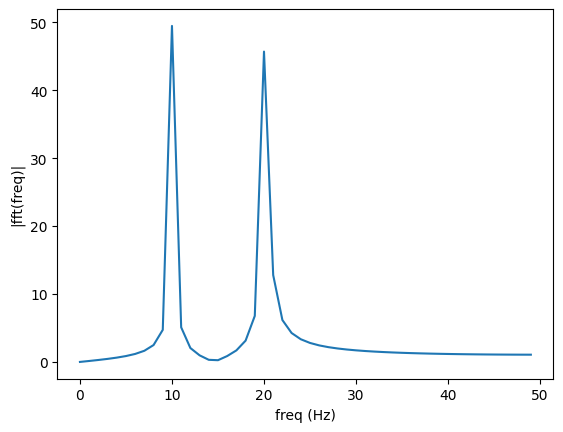

In [3]:
### START CODE HERE ###
def sine_wave(amplitude, freq, time): ## y(t) = amplitude * sin(2 * pi * freq * t)
  return amplitude * np.sin(2 * math.pi * freq * time)

## Making waves:
amp = 1
n = 100
t = np.linspace(0,1, n)

sine_1 = sine_wave(amplitude= amp, freq= 10, time= t) # Creating sine wave of f= 10Hz
sine_2 = sine_wave(amplitude= amp, freq= 20, time= t) # Creating sine wave of f= 20Hz
sine_total = sine_1 + sine_2 # Combining waves

## Calculating Fourier Transform & Frequencies of waves:
fourier = np.fft.fft(sine_total)[range(int(n/2))] # Fourier Transform of our combined waves
frequencies = np.fft.fftfreq(n, 1/n)[range(int(n/2))] # Frequencies

## Ploting the Frequency Spectrum:
plt.plot(frequencies, np.abs(fourier))
plt.xlabel('freq (Hz)')
plt.ylabel('|fft(freq)|')
plt.show()

### END CODE HERE ###

Search about Gaussian white noise and secribe it in your report.

*`10 points`*

Now corrupt the data with this noise and show the frequency spectrum.

*`10 points`*

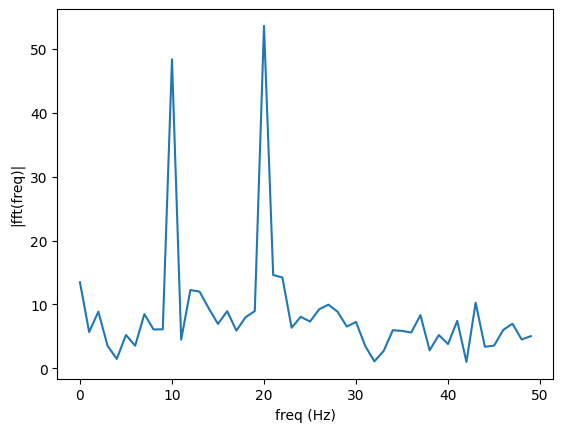

In [4]:
### START CODE HERE ###

## Noise Creater:
def WGN(variance= 1, mean=0, size= 0, T=5, h= 0.01):
  if(size == 0):
    size = int(T/h) +1
  noise = np.random.normal(mean, np.sqrt(variance/2), size)
  return noise

## Adding Noise to our Combined Sine Waves:
noisy_data = sine_total + WGN(size = len(sine_total))

## Calculating Fourier Transform & Frequencies of waves:
fourier = np.fft.fft(noisy_data)[range(int(n/2))] # Fourier Transform of our combined waves
frequencies = np.fft.fftfreq(n, 1/n)[range(int(n/2))] # Frequencies

## Ploting the Frequency Spectrum:
plt.plot(frequencies, np.abs(fourier))
plt.xlabel('freq (Hz)')
plt.ylabel('|fft(freq)|')
plt.show()

### END CODE HERE ###

##Bonus:

Search about cross spectrum and describe it in your report. Then calculate and plot the cross power spectral density between the given signals. Describe the reuslts in your report. What does $np.random.seed$ do?



*`15 points`*

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


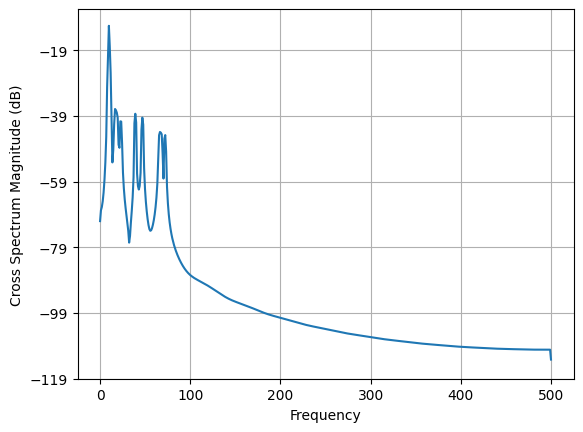

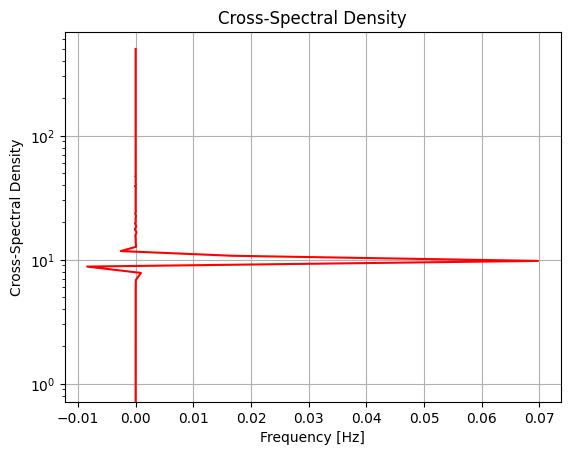

In [5]:
np.random.seed(seed=73)
firstSigFreqs = np.random.randint(1, 100, 5)
secondSigFreqs = np.random.randint(1, 100, 5)
time = np.arange(0, 1, .001)

x = np.zeros(1000)
y = np.zeros(1000)

for freq in (firstSigFreqs):
  x += np.sin(2*np.pi*time*freq)

for freq in (secondSigFreqs):
  y += np.sin(2*np.pi*time*freq)


### START CODE HERE ###

frequencies, Cxy = plt.csd(x, y, NFFT= 1024, Fs=1000)
plt.figure()
plt.semilogy(frequencies, np.abs(Cxy), 'r') # plots the y-axis in logarithmic scale for better visualization
plt.xlabel('Frequency [Hz]')
plt.ylabel('Cross-Spectral Density')
plt.title('Cross-Spectral Density')
plt.grid(True)

plt.show()


### END CODE HERE ###

#** PART II**

#The Leaky Integrate-and-Fire (LIF) model

Now, let's implement one of the simplest mathematical model of a neuron: the leaky integrate-and-fire (LIF) model. The basic idea of LIF neuron was proposed in 1907 by Louis Édouard Lapicque, long before we understood the electrophysiology of a neuron.

The subthreshold membrane potential dynamics of a LIF neuron is described by

\begin{eqnarray}
C_m\frac{dV}{dt} = -g_L(V-E_L) + I,\quad (1)
\end{eqnarray}

Dividing both sides of the above equation by $g_L$ gives

\begin{align}
\tau_m\frac{dV}{dt} = -(V-E_L) + \frac{I}{g_L}\,,\quad (2)
\end{align}


What are the parameters of the the equation? Describe them in your report. What are the results of altering them numerically?


*`10 points`*

Now let's implement this model. For this purpose, we have to solve this equation numerically. Search about Euler's method and describe it in your report.

*`10 points`*

In [6]:
def Euler(f, t0, x0, t, h=0.1):
  n = int((t-t0)/h)
  solution = np.zeros(n)

  t = np.zeros(n)
  t[0] = t0

  solution[0] = x0
  F = f(x0, t0)
  for i in range(1,n):
    t[i] = t0 + i*h
    solution[i] = solution[i-1] + F*h
    F = f(solution[i], t[i])
  return solution,t

A dictionary is given to initialize the parameters of the simulation. Simulate this model using Euler's method. Inject different values of external current and describe the resutls. Don't forget to add a horizontal line to indicate the threshold level.

In [7]:
pars = {}
pars['I'] = 210 # initial current
pars['V_th'] = -55.
pars['V_reset'] = -75.
pars['tau_m'] = 10.
pars['g_L'] = 10.
pars['V_init'] = -75.
pars['E_L'] = -75.
pars['tref'] = 2. # refractory time (ms)


pars['T'] = 400.  # Total duration of simulation [ms]
pars['dt'] = .1   # Simulation time step [ms]



pars['range_t'] = np.arange(0, pars['T'], pars['dt'])  # Vector of discretized time points [ms]

<Axes: xlabel='t', ylabel='V(t)'>

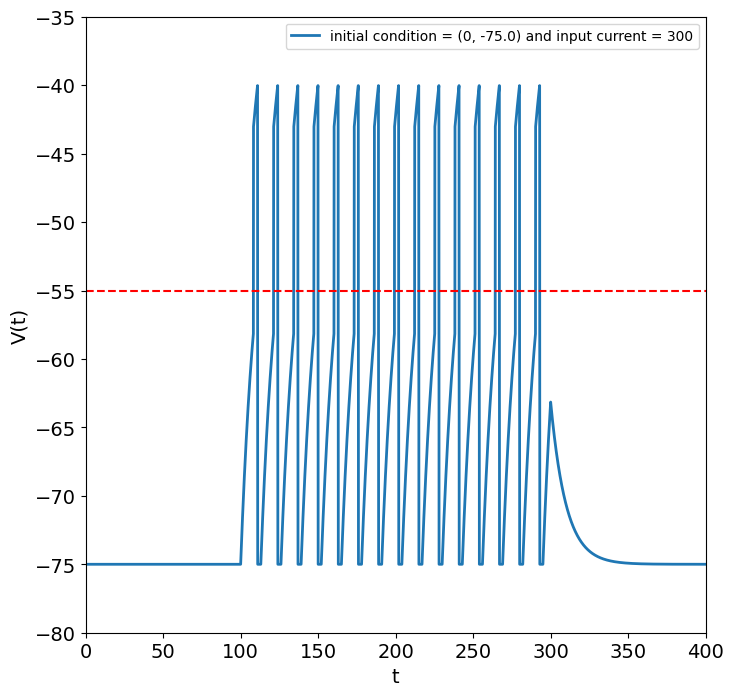

In [8]:
### START CODE HERE ###

fig, ax = plt.subplots(figsize=(8, 8))




def plot(current):
  ax.clear()
  t = np.arange(0, pars['T'], pars['dt'])
  n = t.shape[0]
  v = np.zeros(n)
  v[0] = pars['V_init']
  pars['I'] = current
  rec_spikes = []  # record spike times
  tr = 0  # the count for refractory duration


  # Set current time course
  I = pars['I'] * np.ones(n)

  I[:int(len(I) / 2) - 1000] = 0 #Having zero at the begining
  I[int(len(I) / 2) + 1000:] = 0 #Having zero at the end

  for i in range(n - 1):
    if tr > 0:  # check if in refractory period
      v[i] = pars['V_reset']  # set voltage to reset
      tr = tr - 1 # reduce running counter of refractory period

    elif v[i] >= pars['V_th']:  # if voltage over threshold
      rec_spikes.append(i)  # record spike event
      v[i] = pars['V_reset']  # reset voltage
      tr = pars['tref'] / pars['dt']  # set refractory time

    ##Euler method: Calculate the increment of the membrane potential
    dv = (-(v[i] - pars['E_L']) + I[i]/ pars['g_L']) / pars['tau_m']

    # Update the membrane potential
    v[i+1] = v[i] + dv* pars['dt']

  # Simulating Spikes
  for i in rec_spikes:
    v[int(i-pars['T']/len(rec_spikes)):i] += 15

  ## Plotting

  ax.plot(t, v,linewidth=2, label= f'initial condition = {(0,v[0])} and input current = {current}')
  ax.axhline(y = pars['V_th'], color = 'r', linestyle = '--')

  # set the axis labels
  ax.set_xlabel('t',fontsize=14)
  ax.set_ylabel('V(t)',fontsize=14)

  # adjust the font size of x and y axes
  ax.tick_params(axis='both', which='major', labelsize=14)

  ax.set_xlim((0,pars['T']))
  ax.set_ylim((-80,-35))
  # insert legend
  ax.legend(fontsize=10)
  return ax


plot(current = 300)
#plo.show()
### END CODE HERE ###

##Bonus:

Create a gif!
Each frame contains a solved and plotted simulation. Alter the injected current in each frame and you will see an incredible result!


*`15 points`*

In [9]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython import display

In [10]:
### START CODE HERE ###
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython import display
%matplotlib inline

# Create a list of values for initial current
I_values = np.arange(0,500,10)

# Create an animation
anim = FuncAnimation(fig, plot, frames=I_values, interval=150)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
### END CODE HERE ###



```
# This is formatted as code
```

#The Hodgkin-Huxley model

The Hodgkin–Huxley model, or conductance-based model, is a mathematical model that describes how action potentials in neurons are initiated and propagated. It is a set of nonlinear differential equations that approximates the electrical characteristics of excitable cells such as neurons and muscle cells. It is a continuous-time dynamical system.

4 equations of Hodgkin-Huxley model  
* $C_M\displaystyle \frac{dV}{dt}=-g_{Na}(V-V_{Na})-g_k(V-V_K)-g_l(V-V_l)+I$ ($V$: Membrane Potential)  
* $\displaystyle \frac{dh}{dt}=\alpha_h{(V)}(1-h)-\beta_h(V)h$ ($h$: Na Inactivation)  
* $\displaystyle \frac{dm}{dt}=\alpha_m{(V)}(1-m)-\beta_m(V)m$ ($m$: Na Activation)  
* $\displaystyle \frac{dn}{dt}=\alpha_n{(V)}(1-n)-\beta_n(V)n$ ($n$: K Activation)  

Describe the parameters in your report.

*`10 points`*

Now let's implement this model. Some of the functions are given. Use Euler's method or any other method to solve this equaiton for the given parametrs. Choose the injected current wisely.

*`15 points`*

In [11]:
def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

dt = 0.01;
T0 = 100
T  = math.ceil(T0/dt)  # [ms]


t = np.arange(0,T)*dt



gNa0 = 120   # [mS/cm^2]
ENa  = 115;  # [mV]
gK0  = 36;   # [mS/cm^2]
EK   = -12;  # [mV]
gL0  = 0.3;  # [mS/cm^2]
EL   = 10.6; # [mV]


In [12]:
from scipy.integrate import odeint

### START CODE HERE ###
# Input stimulus
def Id(t):
    if 30 < t < 60:
        return 5000
    return 0.0
# Initialize variables
V0 = -65
m0 = alphaM(V0) / (alphaM(V0) + betaM(V0))
h0 = alphaH(V0) / (alphaH(V0) + betaH(V0))
n0 = alphaN(V0) / (alphaN(V0) + betaN(V0))



I = [Id(j) for j in t]

# Compute derivatives
def ddt(y, t0):
    dy = np.zeros((4,))

    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    Cm = 1

    GK = (gK0 / Cm) * np.power(n, 4.0)
    GNa = (gNa0 / Cm) * np.power(m, 3.0) * h
    GL = gL0 / Cm

    dy[0] = (Id(t0) / Cm) - (GK * (Vm - EK)) - (GNa * (Vm - ENa)) - (GL * (Vm - EL))

    # dn/dt
    dy[1] = (alphaN(Vm) * (1.0 - n)) - (betaN(Vm) * n)

    # dm/dt
    dy[2] = (alphaM(Vm) * (1.0 - m)) - (betaM(Vm) * m)

    # dh/dt
    dy[3] = (alphaH(Vm) * (1.0 - h)) - (betaH(Vm) * h)

    return dy

# State (Vm, n, m, h)
Y = np.array([V0, n0, m0, h0])

# Solve ODE system
Vy = odeint(ddt, Y, t)
### END CODE HERE ###

Now plot all 4 solved equations! What are the dynamics of these equations? Describe it in your report.

*`20 points`*

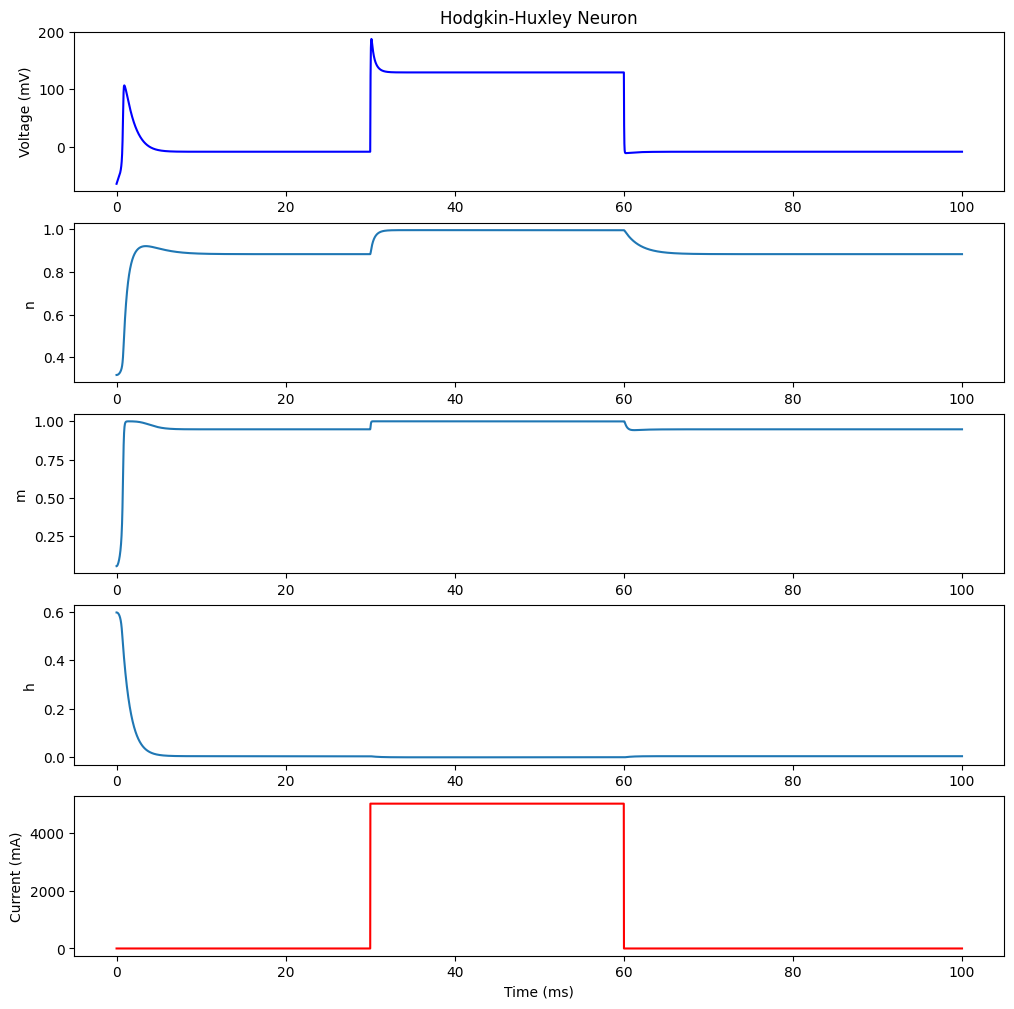

In [13]:
### START CODE HERE ###
# Plot the results
plt.figure(figsize=(12,12))
plt.subplot(5,1,1)
plt.plot(t, Vy[:,0],'-b')
plt.ylabel('Voltage (mV)')
plt.title('Hodgkin-Huxley Neuron')

plt.subplot(5,1,2)
plt.plot(t, Vy[:,1])
plt.ylabel('n')

plt.subplot(5,1,3)
plt.plot(t, Vy[:,2])
plt.ylabel('m')

plt.subplot(5,1,4)
plt.plot(t, Vy[:,3])
plt.ylabel('h')

plt.subplot(5,1,5)
plt.plot(t,I,'-r')
plt.ylabel('Current (mA)')
plt.xlabel('Time (ms)')
#plt.xlim((-.2,10))
plt.show()
### END CODE HERE ###